In [29]:
import os
import time
import shutil
import pickle5 as pickle
import pydicom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pydicom.pixel_data_handlers.util import apply_voi_lut

In [30]:
df_data = pd.read_pickle('/home/single1/BACKUP/tintrung/brainmri/tinnvt/bbox.pkl')
pd.set_option("display.max_colwidth", None)
df_data.head()

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesUID,StudyUID
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass/Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass/Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]


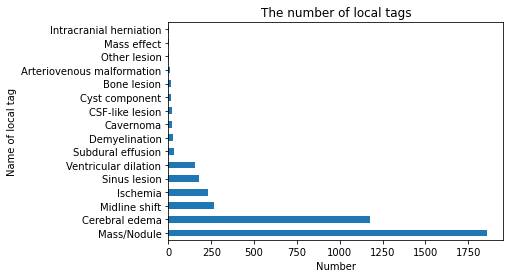

In [31]:
plot_tag = df_data['Tag'].value_counts()
plot_tag.plot(kind='barh')
plt.title("The number of local tags")
plt.ylabel("Name of local tag")
plt.xlabel("Number")
plt.savefig('tag_eda.png', dpi=600, format='png', bbox_inches='tight')

In [32]:
# Classificate file dicom based on tags 
ROOT_INPUT_PATH = '/home/single1/BACKUP/tintrung/brain-mri-tumor-dicom-masked'
ROOT_CLASSIFICATION_TAGS = '/home/single1/BACKUP/tintrung/local_tags_classification'

df_data_new = df_data.replace('Mass/Nodule', 'Mass_Nodule')
df_tag = df_data_new['Tag'].value_counts()
tagKeys = df_tag.keys()
tagKeys =  list(tagKeys)
tagKeys
for tagName in tagKeys:
    print(f'>>> Processing ... {tagName}')
    curDf = df_data_new[df_data_new['Tag']==tagName].reset_index()
    dcmTags = curDf['DicomFileName']
    studyuid = curDf['StudyUID']
    if not os.path.exists(os.path.join(ROOT_CLASSIFICATION_TAGS, tagName)):
        os.mkdir(os.path.join(ROOT_CLASSIFICATION_TAGS, tagName))
    for i in range(len(dcmTags)):
        print(f'=======> Copying file dicom {dcmTags[i]}')
        tagDir = os.path.join(ROOT_CLASSIFICATION_TAGS, tagName, studyuid[i][0])
        if not os.path.exists(tagDir):
            os.mkdir(tagDir)
        input_pth = os.path.join(ROOT_INPUT_PATH, studyuid[i][0], dcmTags[i])
        tar_pth = os.path.join(tagDir, dcmTags[i])
        shutil.copy(input_pth, tar_pth)
    print(f'>>> Finish process {tagName}')

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesUID,StudyUID
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
...,...,...,...,...,...,...,...
4018,19,"[121.01643489600188, 199.82456088968692, 123.07129314974468, 90.93663391925102]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.132.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4019,20,"[121.46104175706812, 200.35995082141872, 127.6288959774083, 90.52762630680033]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.120.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4020,21,"[145.73177631709083, 207.09768705605745, 100.34752295568799, 82.371301570377]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.133.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4021,22,"[162.06950293286584, 211.4646387758313, 81.91099634282494, 76.85932466413766]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.121.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]


['Mass_Nodule',
 'Cerebral edema',
 'Midline shift',
 'Ischemia',
 'Sinus lesion',
 'Ventricular dilation',
 'Subdural effusion',
 'Demyelination',
 'Cavernoma',
 'CSF-like lesion',
 'Cyst component',
 'Bone lesion',
 'Arteriovenous malformation',
 'Other lesion',
 'Mass effect',
 'Intracranial herniation']

In [7]:
# Classificate file dicom based on axials T1, T2, FLAIR
df_axial = pd.read_csv('/home/single1/BACKUP/tintrung/brainmri/tinnvt/data_series_axial.csv')
df_axial.head()

,SeriesInstanceUID,StudyInstanceUID,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge
0,1.2.840.113619.2.5.1824252116715953893321595389332087000,1.2.840.113619.6.388.43804629438438929368265285531169231542,20,axial,dwi
1,1.2.840.113619.2.410.15512023.5814788.29583.15965231320178,1.2.840.113619.6.410.187510748184269179517286452881559008700,25,axial,flair
2,1.2.840.113619.2.410.15512023.5814788.16076.15936633700355,1.2.840.113619.6.410.325252479896783011599946586280965820839,25,axial,t2
3,1.2.840.113619.2.410.15512023.5814788.21951.15934023340116,1.2.840.113619.6.410.247974811334191840181087968172054686796,18,axial,dwi
4,1.2.840.113619.2.410.15512023.5814788.25706.15997846080904,1.2.840.113619.6.410.284829606723725549679006570235743894743,18,axial,dwi


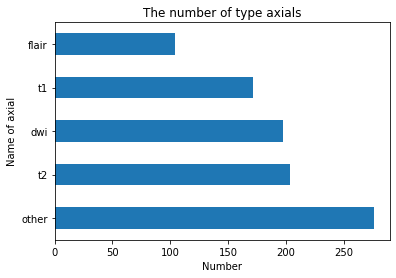

In [8]:
plot_axial = df_axial['SeriesLabelMerge'].value_counts()
plot_axial.plot(kind='barh')
plt.title("The number of type axials")
plt.ylabel("Name of axial")
plt.xlabel("Number")
plt.savefig('axial_eda.png', dpi=600, format='png', bbox_inches='tight')

In [18]:
df_data_2new = df_data_new.rename(columns={'SeriesUID':'SeriesInstanceUID'})
df_data_2new

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID,StudyUID
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,[1.2.840.113619.6.388.299644115384907986947717284768417434914]
...,...,...,...,...,...,...,...
4018,19,"[121.01643489600188, 199.82456088968692, 123.07129314974468, 90.93663391925102]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.132.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4019,20,"[121.46104175706812, 200.35995082141872, 127.6288959774083, 90.52762630680033]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.120.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4020,21,"[145.73177631709083, 207.09768705605745, 100.34752295568799, 82.371301570377]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.133.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]
4021,22,"[162.06950293286584, 211.4646387758313, 81.91099634282494, 76.85932466413766]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.121.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,[1.2.840.113619.6.410.67189537291259173420834055643483688197]


In [20]:
df_result = pd.merge(df_data_2new, df_axial, how='inner', on=['SeriesInstanceUID'])
df_result = df_result.drop(columns=['StudyUID'])
df_result

,SliceIndex,Bbox,Tag,LesionIndex,DicomFileName,SeriesInstanceUID,StudyInstanceUID,SeriesNumberInstances,SeriesPlane,SeriesLabelMerge
0,3,"[154.39346367564397, 156.2300149527727, 63.81449149132925, 73.46089487706749]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.759.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
1,4,"[156.63331754848957, 178.49881788556516, 46.00571478009451, 42.29562871331274]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
2,4,"[148.79579153229275, 153.6374763449819, 77.36409332267735, 97.54907814533797]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.760.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
3,5,"[151.63636935938857, 179.06321879095267, 56.57976676715177, 59.54796005758689]",Mass_Nodule,0,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
4,5,"[144.0751101398004, 151.45225823234563, 88.79133045882301, 117.86416827209172]",Cerebral edema,1,1.2.840.113619.2.388.57473.14165493.11868.1594941404.761.dcm,1.2.840.113619.2.388.57473.14165493.12597.1594941312.645,1.2.840.113619.6.388.299644115384907986947717284768417434914,20,axial,flair
...,...,...,...,...,...,...,...,...,...,...
4018,19,"[121.01643489600188, 199.82456088968692, 123.07129314974468, 90.93663391925102]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.132.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair
4019,20,"[121.46104175706812, 200.35995082141872, 127.6288959774083, 90.52762630680033]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.120.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair
4020,21,"[145.73177631709083, 207.09768705605745, 100.34752295568799, 82.371301570377]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.133.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair
4021,22,"[162.06950293286584, 211.4646387758313, 81.91099634282494, 76.85932466413766]",Arteriovenous malformation,1,1.2.840.113619.2.410.15512023.5814788.12697.1596413176.121.dcm,1.2.840.113619.2.410.15512023.5814788.13131.1596413079.131,1.2.840.113619.6.410.67189537291259173420834055643483688197,25,axial,flair


In [22]:
df_result.to_pickle('/home/single1/BACKUP/tintrung/brainmri/tinnvt/classificate_local_tags.pkl')